In [1]:
import time
import os
import tushare as ts
from datetime import datetime
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output

sys.path.append("../utils/")
import date_util
import token_util
import enter_util
import stock_util

### 提取数据

In [2]:
trade_date = "20190830"
delta_price = 30.0

In [ ]:
stock_list = stock_util.get_stock_list(trade_date, delta_price)

In [3]:
stock_list = pd.read_csv("./data/data_{}.csv".format(trade_date))
stock_list.head()

,ts_code,name,price
0,000001.SZ,平安银行,14.145
1,000002.SZ,万科A,25.885
2,000004.SZ,国农科技,20.090
3,000005.SZ,世纪星源,3.135
4,000006.SZ,深振业A,5.360


### 选出符合入场点的股票

In [4]:
# 选股

end_date = '20190930'
start_date = date_util.get_date_weeks_before(2, date=end_date)

golden_list = []

columns = ["stock_code", "pct_chg_short", "his_macd_discount", "amount_mean"]
choose_list = pd.DataFrame(columns = columns)

for i in range(len(stock_list)):
    stock_code = stock_list.iloc[i]["ts_code"]
    
    try:
        ma2_1, ma2_2, ma5_1, ma5_2, amount_mean, ptc_chg_short = enter_util.cal_ma(stock_code, start_date, end_date)

        if ma2_1 < ma5_1 and ma2_2 > ma5_2 :

            golden_list.append(stock_code)
            macd, data_macd, his_macd_discount, macd_trend = enter_util.cal_macd(stock_code, end_date)
            list_tmp = pd.DataFrame([[stock_code, ptc_chg_short, his_macd_discount, amount_mean]], columns=columns)

            if macd > 0:
                if macd_trend:
                    choose_list = choose_list.append(list_tmp)
#             else:
#                 if enter_util.negetive_macd_judge(data_macd) :
#                     choose_list = choose_list.append(list_tmp)
    except:
        time.sleep(3)
    
    if i % 100 == 0:
        clear_output(True)
        print(i)
        print(choose_list)

# 数据归一化

for column in choose_list.columns[1:]:
    c_data = choose_list[column]
    choose_list[column] = (c_data-c_data.min())/(c_data.max() - c_data.min())

# 排序

def get_rank_factor(arr):
    pct_chg_short = arr["pct_chg_short"] * 0.5
    his_macd_discount = arr["his_macd_discount"]
    amount_mean = arr["amount_mean"]
    return pct_chg_short+his_macd_discount+amount_mean

choose_list["rank_factor"] = choose_list.apply(get_rank_factor, axis = 1)
choose_list = choose_list.sort_values(by="rank_factor", ascending= False).reset_index(drop=True)

2600
  stock_code  pct_chg_short  his_macd_discount    amount_mean
0  000422.SZ         1.7643           0.557250   20687.255818
0  000429.SZ         0.3923           0.541750   25152.578727
0  000611.SZ         3.5079           0.544000    8469.332364
0  000707.SZ         6.4033           0.539250   17007.624273
0  000806.SZ         3.0364           0.561750   26268.826000
0  000895.SZ         2.9194           0.517750  371628.446818
0  002111.SZ        -0.5079           0.532030  227446.760818
0  002324.SZ         1.9616           0.554681   55106.132636
0  002351.SZ         7.7627           0.552052   99601.748000
0  002563.SZ         4.6279           0.525399   75795.938545
0  002627.SZ         3.9481           0.543592   15941.752909
0  002739.SZ         6.5093           0.565714  313876.144909
0  002741.SZ         2.2792           0.537396   93813.375364
0  002873.SZ         7.9619           0.584483   30644.369727
0  600201.SH         3.1303           0.530750  377268.151455
0  

### TEST

In [5]:
choose_list

,stock_code,pct_chg_short,his_macd_discount,amount_mean,rank_factor
0,002739.SZ,0.555163,0.766502,0.828617,1.872701
1,600201.SH,0.287835,0.454367,1.000000,1.598284
2,000895.SZ,0.271149,0.338312,0.984753,1.458640
3,002873.SZ,0.670084,0.934053,0.062890,1.331985
4,002351.SZ,0.654325,0.644534,0.249319,1.221015
5,600894.SH,0.432733,0.650766,0.297782,1.164915
6,603178.SH,0.183213,1.000000,0.061499,1.153105
7,603607.SH,1.000000,0.556531,0.068411,1.124942
8,601567.SH,0.554055,0.706589,0.128700,1.112317
9,603015.SH,0.492496,0.786521,0.029898,1.062668


In [91]:
last_m2, last_m5 = df.iloc[0]['ma2'], df.iloc[0]['ma5']
this_m2, this_m5 = 0, 0
golden_port = []

def transform_date(date):
    date_list = list(date)
    date_list.insert(4, "-")
    date_list.insert(7, "-")
    date = "".join(date_list)
    
    return date
    
for i in range(1, len(df)):
    
    this_m2, this_m5 = df.iloc[i]['ma2'], df.iloc[i]['ma5']
    
    if last_m2 < last_m5 and this_m2 > this_m5 :
        date = df.iloc[i]['trade_date']
        date = transform_date(date)
        golden_port.append(date)

    last_m2, last_m5 = this_m2, this_m5

In [92]:
golden_port

['2018-01-23',
 '2018-02-13',
 '2018-03-02',
 '2018-03-06',
 '2018-03-15',
 '2018-03-30',
 '2018-04-19',
 '2018-04-24',
 '2018-05-02',
 '2018-05-16',
 '2018-05-23',
 '2018-05-28',
 '2018-06-12',
 '2018-06-22',
 '2018-07-02',
 '2018-07-10',
 '2018-07-25',
 '2018-08-01',
 '2018-08-10',
 '2018-08-22',
 '2018-09-17',
 '2018-10-15',
 '2018-10-22',
 '2018-11-01',
 '2018-11-12',
 '2018-11-29',
 '2018-12-12',
 '2018-12-25']

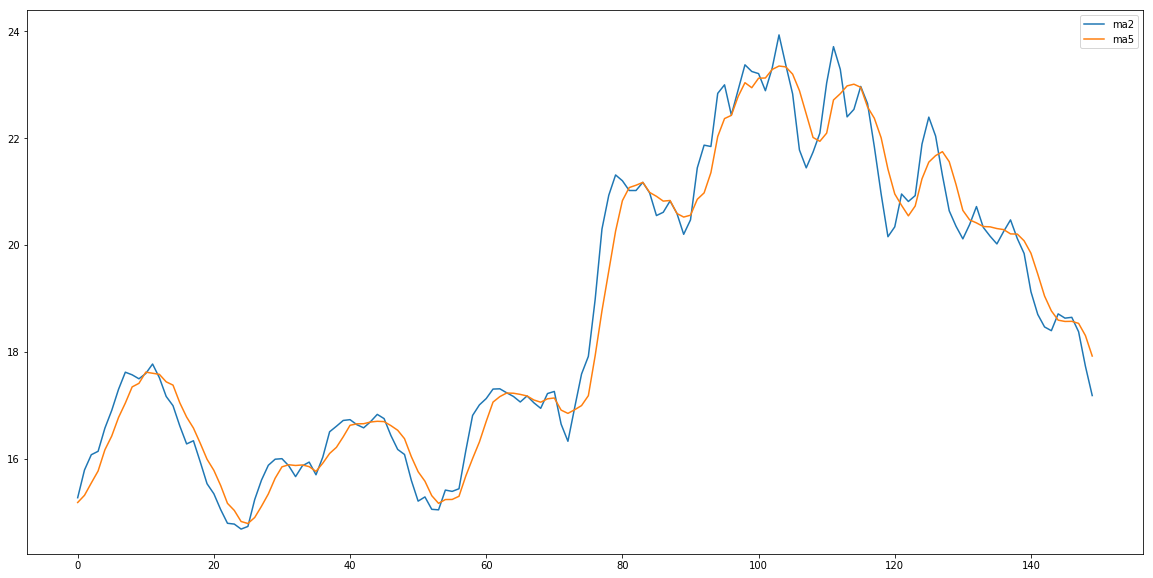

In [93]:
plt.figure(figsize=(20, 10))
plt.plot(df['ma2'].values[: 150], label="ma2")
plt.plot(df['ma5'].values[: 150], label="ma5")
plt.legend()
plt.show()

In [81]:
df.iloc[0]['trade_date']

'20180108'